# Análise de Vendas Chocolura

In [27]:
import pandas as pd
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.seasonal import seasonal_decompose

In [28]:
dados = pd.read_csv('arquivos/chocolura.csv')
dados

,mes,vendas
0,2017-01,210
1,2017-02,185
2,2017-03,209
3,2017-04,280
4,2017-05,211
5,2017-06,300
6,2017-07,210
7,2017-08,205
8,2017-09,208
9,2017-10,210


In [29]:
def plot_comparacao(x, y1, y2, y3, dataset, título):
    plt.figure(figsize = (16,12))
    sns.set_palette('Accent')
    sns.set_style('darkgrid')
    grafico1 = plt.subplot(3, 1, 1)
    grafico1.set_title(título, fontsize = 18, loc = 'left')
    sns.lineplot(x = x, y = y1, data = dataset)
    plt.subplot(3, 1, 2)
    sns.lineplot(x = x, y = y2, data = dataset)
    plt.subplot(3, 1, 3)
    sns.lineplot(x = x, y = y3, data = dataset)
    grafico1 = grafico1

In [30]:
dados.dtypes

mes       object
vendas     int64
dtype: object

In [31]:
dados['mes'] = pd.to_datetime(dados['mes'])
dados.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [32]:
print('Quantidade de linhas e colunas: ', dados.shape)
print('Quantidade de dados nulos: ', dados.isna().sum().sum())

Quantidade de linhas e colunas:  (24, 2)
Quantidade de dados nulos:  0


In [33]:
dados['aumento'] = dados['vendas'].diff()
dados['aceleração'] = dados['aumento'].diff()
dados

,mes,vendas,aumento,aceleração
0,2017-01-01,210,NaN,NaN
1,2017-02-01,185,-25.0,NaN
2,2017-03-01,209,24.0,49.0
3,2017-04-01,280,71.0,47.0
4,2017-05-01,211,-69.0,-140.0
5,2017-06-01,300,89.0,158.0
6,2017-07-01,210,-90.0,-179.0
7,2017-08-01,205,-5.0,85.0
8,2017-09-01,208,3.0,8.0
9,2017-10-01,210,2.0,-1.0


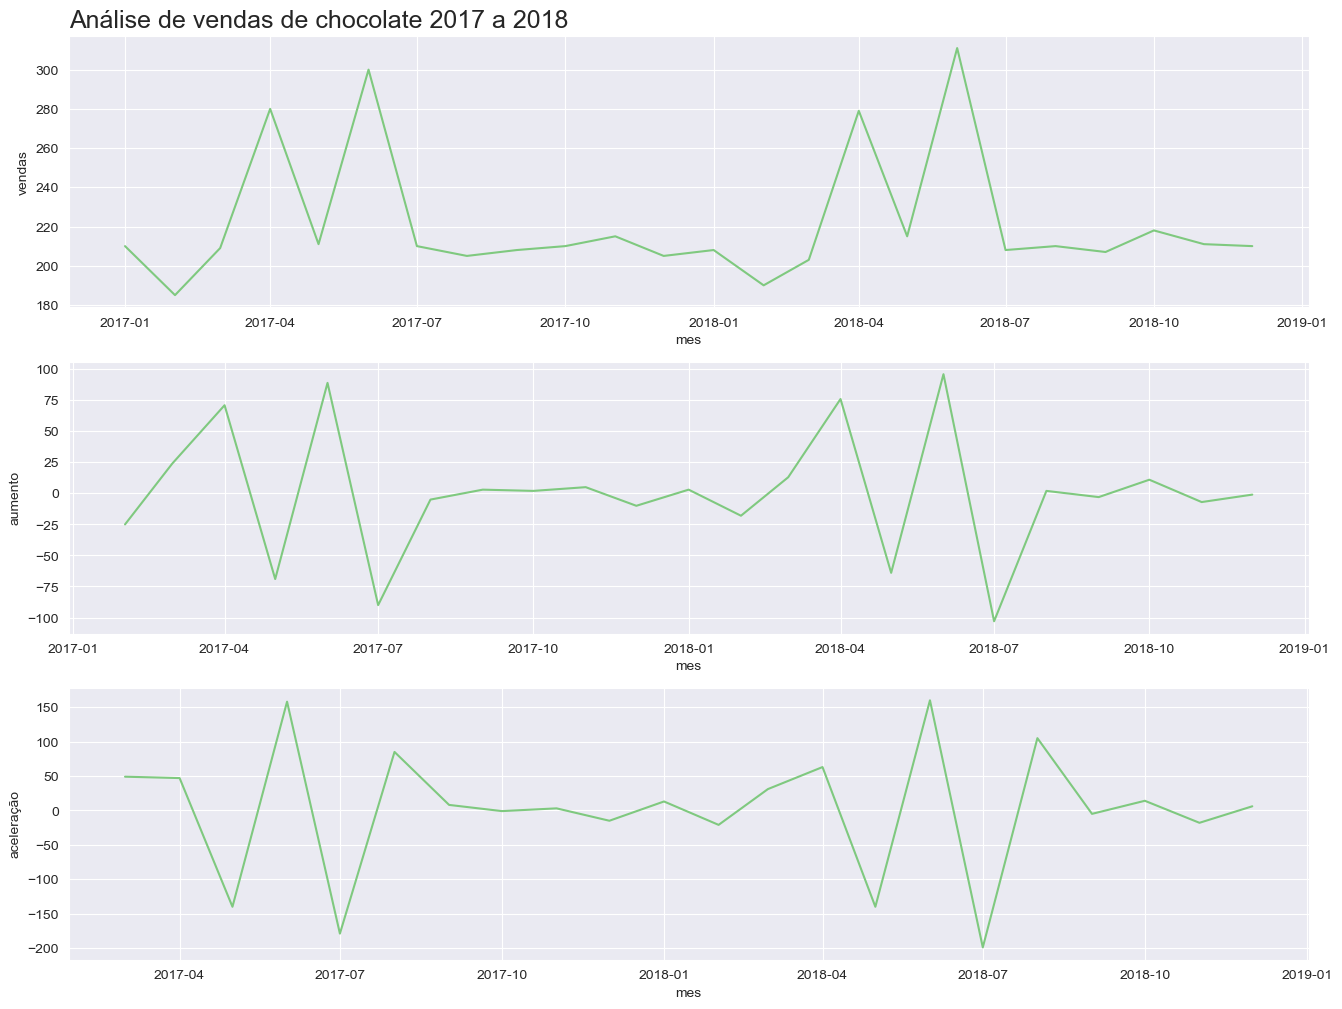

In [34]:
plot_comparacao('mes', 'vendas', 'aumento', 'aceleração', dados, 'Análise de vendas de chocolate 2017 a 2018')

## Vendas diárias (Outubro e Novembro)

In [35]:
vendas_diarias = pd.read_csv('arquivos/vendas_por_dia.csv')
vendas_diarias

,dia,vendas
0,2018-10-01,50
1,2018-10-02,48
2,2018-10-03,56
3,2018-10-04,50
4,2018-10-05,51
...,...,...
56,2018-11-26,54
57,2018-11-27,60
58,2018-11-28,49
59,2018-11-29,50


In [36]:
vendas_diarias.dtypes

dia       object
vendas     int64
dtype: object

In [37]:
print('Quantidade de linhas e colunas: ', vendas_diarias.shape)
print('Quantidade de dados nulos: ', vendas_diarias.isna().sum().sum())

Quantidade de linhas e colunas:  (61, 2)
Quantidade de dados nulos:  0


In [38]:
vendas_diarias['dia'] = pd.to_datetime(vendas_diarias['dia'])
vendas_diarias.dtypes

dia       datetime64[ns]
vendas             int64
dtype: object

In [39]:
vendas_diarias['aumento'] = vendas_diarias['vendas'].diff()
vendas_diarias['aceleração'] = vendas_diarias['aumento'].diff()
vendas_diarias

,dia,vendas,aumento,aceleração
0,2018-10-01,50,NaN,NaN
1,2018-10-02,48,-2.0,NaN
2,2018-10-03,56,8.0,10.0
3,2018-10-04,50,-6.0,-14.0
4,2018-10-05,51,1.0,7.0
...,...,...,...,...
56,2018-11-26,54,34.0,31.0
57,2018-11-27,60,6.0,-28.0
58,2018-11-28,49,-11.0,-17.0
59,2018-11-29,50,1.0,12.0


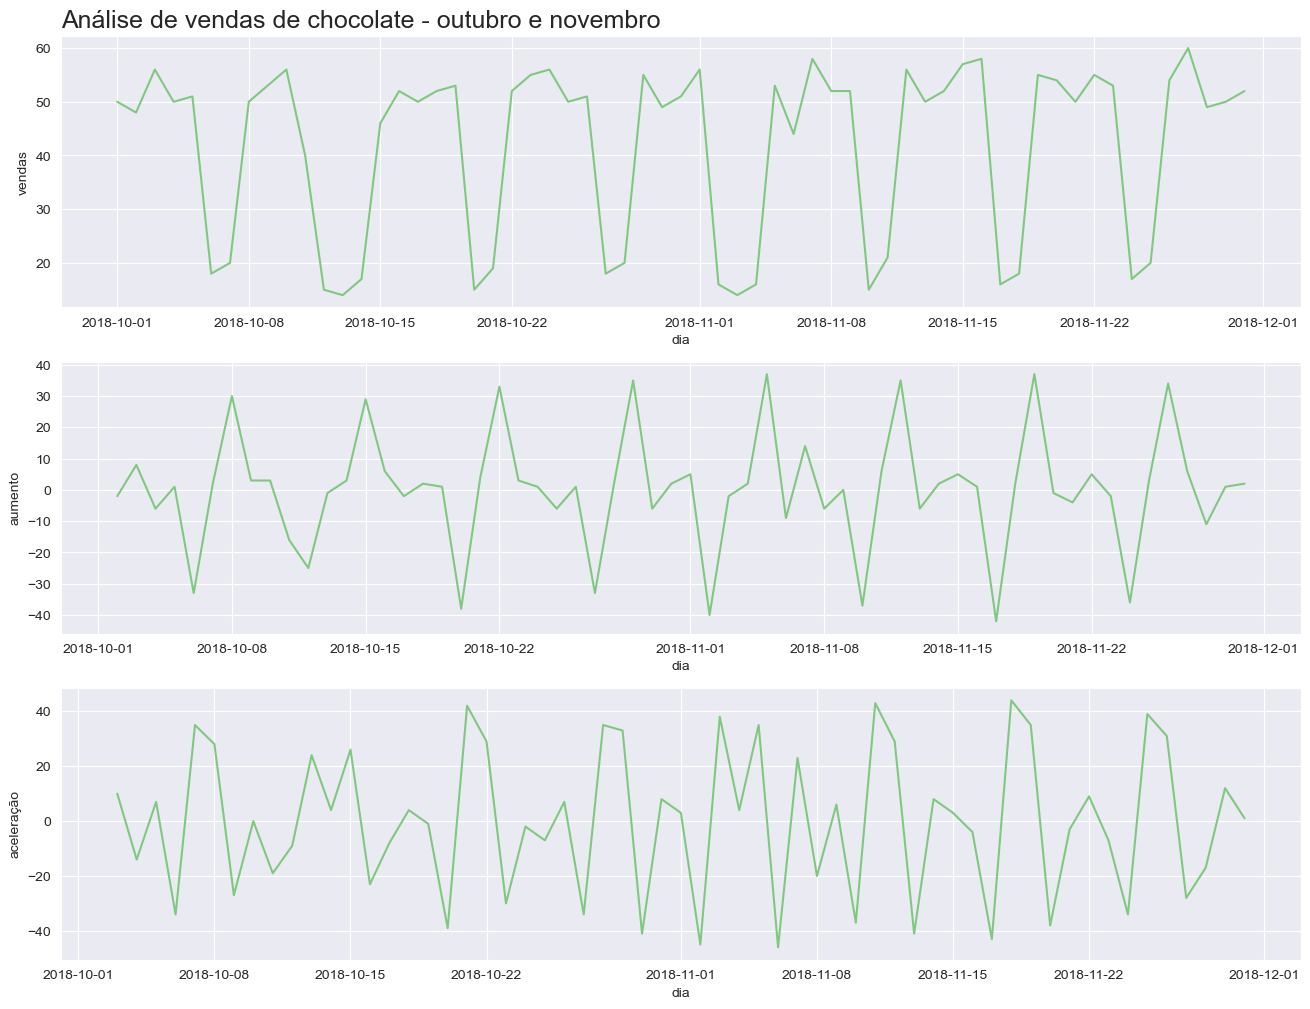

In [40]:
plot_comparacao('dia', 'vendas', 'aumento', 'aceleração', vendas_diarias, 'Análise de vendas de chocolate - outubro e novembro')

## Análisando a Sazonalidade

In [41]:
vendas_diarias['dia_da_semana'] = vendas_diarias['dia'].dt.day_name()
vendas_diarias

,dia,vendas,aumento,aceleração,dia_da_semana
0,2018-10-01,50,NaN,NaN,Monday
1,2018-10-02,48,-2.0,NaN,Tuesday
2,2018-10-03,56,8.0,10.0,Wednesday
3,2018-10-04,50,-6.0,-14.0,Thursday
4,2018-10-05,51,1.0,7.0,Friday
...,...,...,...,...,...
56,2018-11-26,54,34.0,31.0,Monday
57,2018-11-27,60,6.0,-28.0,Tuesday
58,2018-11-28,49,-11.0,-17.0,Wednesday
59,2018-11-29,50,1.0,12.0,Thursday


In [42]:
vendas_diarias['dia_da_semana'].unique()

array(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
       'Sunday'], dtype=object)

In [43]:
dias_da_semana = {'Monday': 'Segunda', 
                  'Tuesday': 'Terça', 
                  'Wednesday': 'Quarta',
                  'Thursday': 'Quinta', 
                  'Friday': 'Sexta', 
                  'Saturday': 'Sábado',
                  'Sunday': 'Domingo'}

In [44]:
vendas_diarias['dia_da_semana'] = vendas_diarias['dia_da_semana'].map(dias_da_semana)
vendas_diarias

,dia,vendas,aumento,aceleração,dia_da_semana
0,2018-10-01,50,NaN,NaN,Segunda
1,2018-10-02,48,-2.0,NaN,Terça
2,2018-10-03,56,8.0,10.0,Quarta
3,2018-10-04,50,-6.0,-14.0,Quinta
4,2018-10-05,51,1.0,7.0,Sexta
...,...,...,...,...,...
56,2018-11-26,54,34.0,31.0,Segunda
57,2018-11-27,60,6.0,-28.0,Terça
58,2018-11-28,49,-11.0,-17.0,Quarta
59,2018-11-29,50,1.0,12.0,Quinta


## Agrupando por dias

In [45]:
vendas_agrupadas = vendas_diarias.groupby('dia_da_semana')['vendas', 'aumento', 'aceleração'].mean().round()
vendas_agrupadas

C:\Users\PC\AppData\Local\Temp\ipykernel_11192\1842831135.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  vendas_agrupadas = vendas_diarias.groupby('dia_da_semana')['vendas', 'aumento', 'aceleração'].mean().round()


,vendas,aumento,aceleração
dia_da_semana,,,
Domingo,19.0,3.0,31.0
Quarta,53.0,1.0,2.0
Quinta,51.0,-2.0,-3.0
Segunda,52.0,34.0,31.0
Sexta,45.0,-7.0,-5.0
Sábado,16.0,-28.0,-20.0
Terça,52.0,-1.0,-34.0


## Correlação das vendas diárias

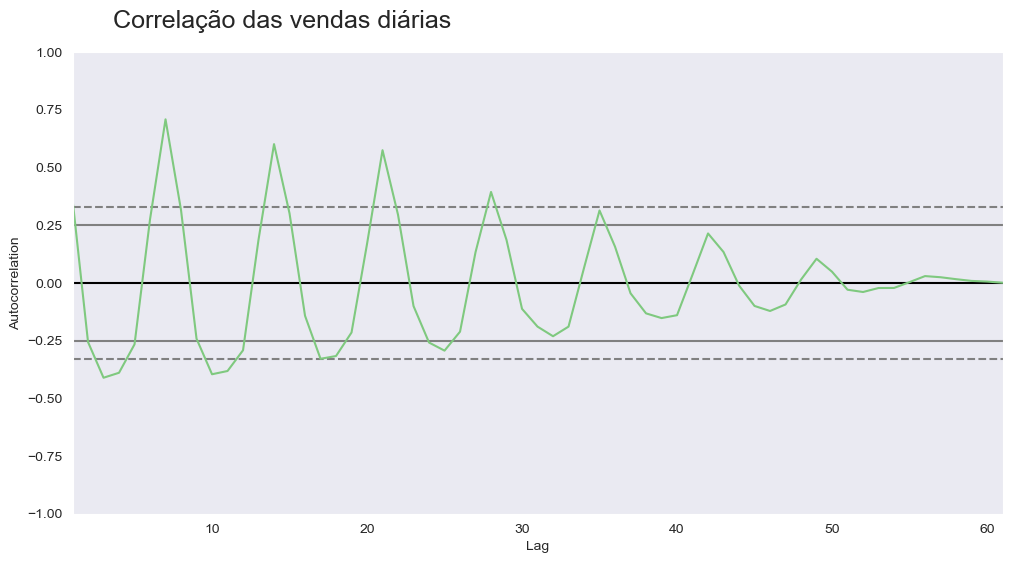

In [46]:
ax = plt.figure(figsize = (12,6))
ax.suptitle('Correlação das vendas diárias', fontsize = 18, x = 0.3, y = 0.95)
autocorrelation_plot(vendas_diarias['vendas'])
ax = ax

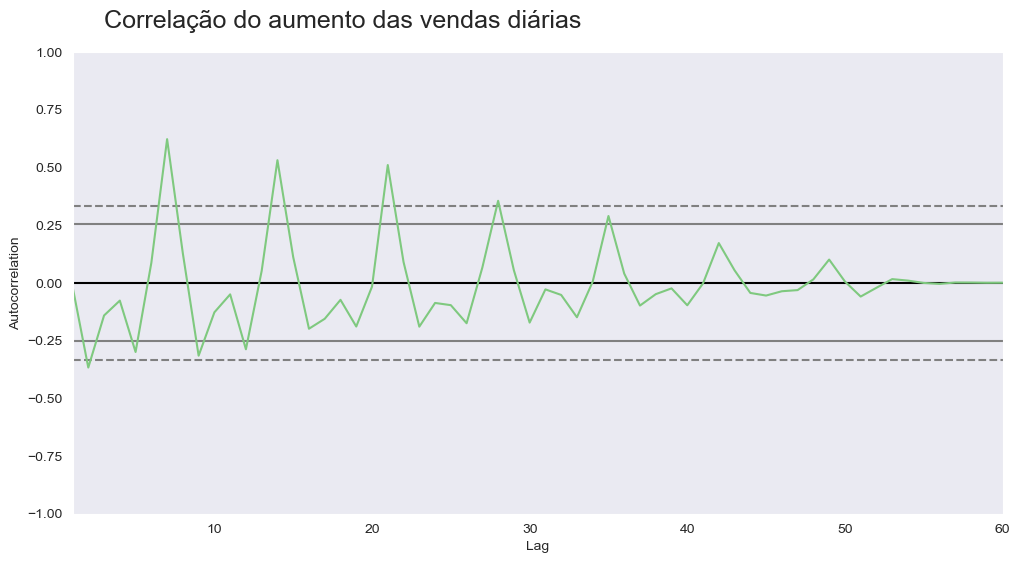

In [47]:
ax = plt.figure(figsize = (12,6))
ax.suptitle('Correlação do aumento das vendas diárias', fontsize = 18, x = 0.35, y = 0.95)
autocorrelation_plot(vendas_diarias['aumento'][1:])
ax = ax

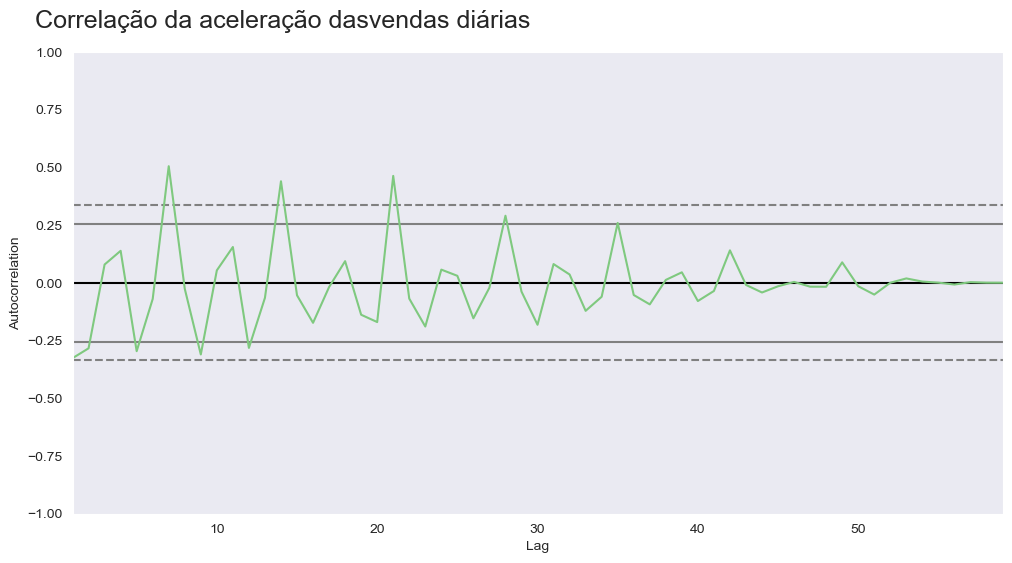

In [48]:
ax = plt.figure(figsize = (12,6))
ax.suptitle('Correlação da aceleração dasvendas diárias', fontsize = 18, x = 0.3, y = 0.95)
autocorrelation_plot(vendas_diarias['aceleração'][2:])
ax = ax

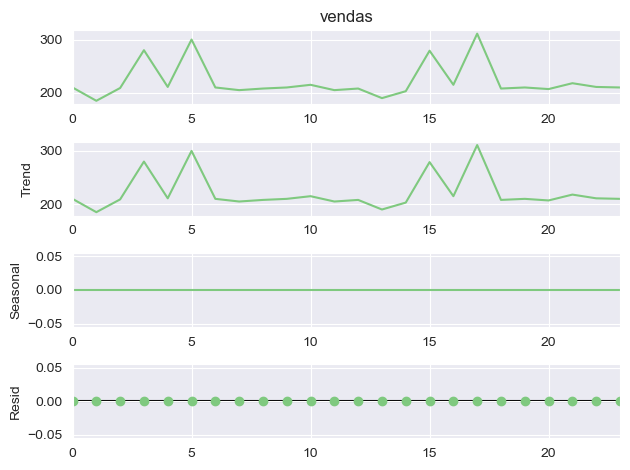

In [62]:
resultado = seasonal_decompose(dados['vendas'], period = 1)
ax = resultado.plot()